# Linear Regression

Imagine we have a series of $n$ datapoints, lets say $(x_1, y_1)$, $(x_2, y_2)$,...,$(x_n, y_n)$.  How do we find a linear (or straight) line that best fits the data?  In this workshop, we will go over how we will be able to find the line that best fits the data using the concept of Linear Regression and PyTorch.

Task 1: Generate Some Random Data

Of course, when we need to find the line of best fit we need to have some data first.  Write a function to generate some testing data within the range of 0 to 9 for both $x$ and $y$ axis.  Try visualising them by plotting them in Matplotlib

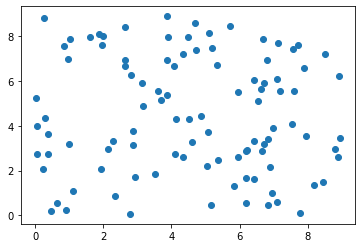

In [185]:
import random
import matplotlib.pyplot as plt

def generate_data(points):
    return [[random.uniform(0, 9), random.uniform(0, 9)] for i in range(points)]

data = generate_data(100)
plt.scatter([i[0] for i in data], [i[1] for i in data])
plt.show()

Since we have generated some random data with no correlation, it is very hard to find a linear connection between the points.

Task 2: Generate Some 'Random' Data

We should generate some data that follows a particular pattern.  Define variables gradient, y_intercept and max_offset.  Now, for each datapoint $(x, y)$, generate a random numbers k1 and k2 such that -max_offset $< k1, k2 <$ max_offset and a random number x that is between 0 and 9.  Your datapoint will be: $(x+k1, f(x)+k2)$ where f(x) is the function gradient * number + y_intercept.

Display the data to verify that your solution looks like a linear line.  Make sure you do not have a large max_offset.

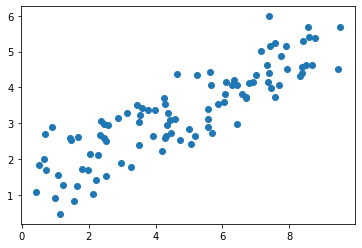

In [186]:
def f(x, m=0.5, c=1):
    return m*x+c

def generate_offset(max_offset):
    return random.uniform(-max_offset, max_offset)

def generate_data(number, max_offset):
    nums = []
    for i in range(number):
        x = random.uniform(0, 9)
        nums.append([x + generate_offset(max_offset), f(x) + generate_offset(max_offset)])
    return nums

data = generate_data(100, 1)
plt.scatter([i[0] for i in data], [i[1] for i in data])
plt.show()


So you can see that your data now looks like it is following some trend, but since we added some offset to each coordinates it doesnt look exactly like the line f(x).  Surely since we added the offset the line of best fit is not f(x) too.

Now, let's try the hard way to find the line of best fit.

Task 3: Linear Regression

In Linear Regression, we use the Loss Function Mean Squared Error with the formula as the following: $\sum (y-f(x))^2$.  Let us now try to implement it in PyTorch.

For the task, we will be using SGD (Stochastic Gradient Descent) as the Optimizer and MSELoss for the loss.  Map all the data to numpy lists and turn them into tensors.  Define a weight that is defined to be a tensor with initialisation as 1 and bias as 0.  Tune the learning rate to be 1, which is considered quite high for most of the tasks.

In [187]:
import numpy as np
import torch

data = generate_data(100, 1.5)
x, y = torch.Tensor([i[0] for i in data]), torch.Tensor([i[1] for i in data])
w, b = torch.nn.Parameter(torch.ones(1)), torch.nn.Parameter(torch.zeros(1))
optimizer, loss_function = torch.optim.SGD([w,b], lr=0.01), torch.nn.MSELoss()

Task 4: Training the Model

Now we have the 'line of best fit' being w*x + b which looks nowhere like the line of best fit.  We have to fine tune the variables w and b so the 'line of best fit' actually is the line of best fit.  Train the model for 1000 epochs and see what happens, make sure that you output the loss every 50 epochs.

In [188]:
for epoch in range(1000):
    y_pred = w * x + b
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print ("Epoch: {:5d}, Loss: {:.5f}".format(epoch+1, loss.data.tolist()))

Epoch:     1, Loss: 4.83899
Epoch:    51, Loss: 1.24992
Epoch:   101, Loss: 1.12048
Epoch:   151, Loss: 1.04068
Epoch:   201, Loss: 0.99148
Epoch:   251, Loss: 0.96114
Epoch:   301, Loss: 0.94244
Epoch:   351, Loss: 0.93091
Epoch:   401, Loss: 0.92380
Epoch:   451, Loss: 0.91941
Epoch:   501, Loss: 0.91671
Epoch:   551, Loss: 0.91504
Epoch:   601, Loss: 0.91402
Epoch:   651, Loss: 0.91338
Epoch:   701, Loss: 0.91299
Epoch:   751, Loss: 0.91275
Epoch:   801, Loss: 0.91260
Epoch:   851, Loss: 0.91251
Epoch:   901, Loss: 0.91245
Epoch:   951, Loss: 0.91242


Task 5: Hyperparameter Tuning

Notice that the loss is increasing quite quickly.  This is because the learning rate is too large - remember the 'Hiking on a Misty Mountain Analogy'?  Having a large learning rate is like having large legs and you might not be able to go to the trough of the mountain.

Try to tune the hyperparameter and find one that converges the loss

Task 6: Display the line

Plot on Matplotlib the Data that is generated and the result from Linear Regression, and display the line of best fit on the graph as well.

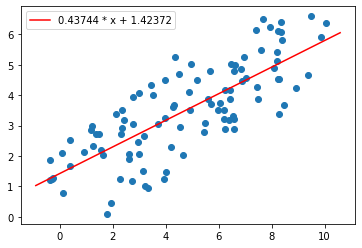

In [189]:
import numpy as np

plt.scatter([i[0] for i in data], [i[1] for i in data])
x1, x2= plt.xlim()
x = np.linspace(x1, x2, 100)
y = w.data.tolist() * x + b.data.tolist()
plt.plot(x, y, label='{:.5f} * x + {:.5f}'.format(w.data.tolist()[0], b.data.tolist()[0]), color='red')
plt.legend()
plt.show()

Congrats! You finished the task!

Feel free to mess about with the gradient and $y$ intercept to try out the program!